# PHY644 HW4
### Maxwell Fine

---

#### Problem 1A:

Here we are asked to simulate Galaxy mergers to get the result  
$$M_{\mathrm{BH}} \sim M_{\mathrm{Gal}}$$

i) Randomly “create” a population of galaxies where $M_{\mathrm{gal}}$ is uniformly distributed in log between  
$10^7 M_\odot$ and $10^8 M_\odot$, and $M_{\mathrm{BH}}$ is uniformly distributed in log between  
$10^4 M_\odot$ and $10^5 M_\odot$.  
In other words, a scatter plot should look roughly uniform on a log-log plot.  
Make this scatter plot to verify that there is no correlation between $M_{\mathrm{BH}}$ and $M_{\mathrm{gal}}$ in your initial population of galaxies.  
(We are trying to establish that mergers are the cause of the correlation, so in our toy model we want to make sure there are no correlations to begin with).

ii) Simulate some mergers by randomly selecting a pair of galaxies to merge.  
Do this many times and show how the correlation gets tighter and tighter as mergers happen.  
(Don’t forget to keep creating new galaxies to replenish ones that have merged!)


In [33]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tqdm import tqdm  


# Random Seed for reproducibility
np.random.seed(644)

# Number of galaxies
N = 50

# Number of mergers
n_mergers = 220000



In [34]:
# Log-uniform sampling function
def log_uniform(low, high, size):
    '''Log-uniform sampling function'''
    return 10 ** np.random.uniform(np.log10(low), np.log10(high), size)

# Correlation function
def correlation(x, y):
    r, p = pearsonr(np.log10(x), np.log10(y))  # compute on log values
    return r, p


# Initialize galaxies
def initialize_population(N):
    M_gal = log_uniform(1e7, 1e8, N)
    M_bh  = log_uniform(1e4, 1e5, N)
    return M_gal, M_bh



# Merge function
def merge_galaxies(M_gal, M_bh, replenish=True):
    i, j = np.random.choice(len(M_gal), size=2, replace=False)
    new_gal = M_gal[i] + M_gal[j]
    new_bh  = M_bh[i] + M_bh[j]
    M_gal = np.delete(M_gal, [i, j])
    M_bh  = np.delete(M_bh, [i, j])
    M_gal = np.append(M_gal, new_gal)
    M_bh  = np.append(M_bh, new_bh)
    
    if replenish:
        new_gals, new_bhs = initialize_population(2)
        M_gal = np.append(M_gal, new_gals)
        M_bh  = np.append(M_bh, new_bhs)
    
    return M_gal, M_bh

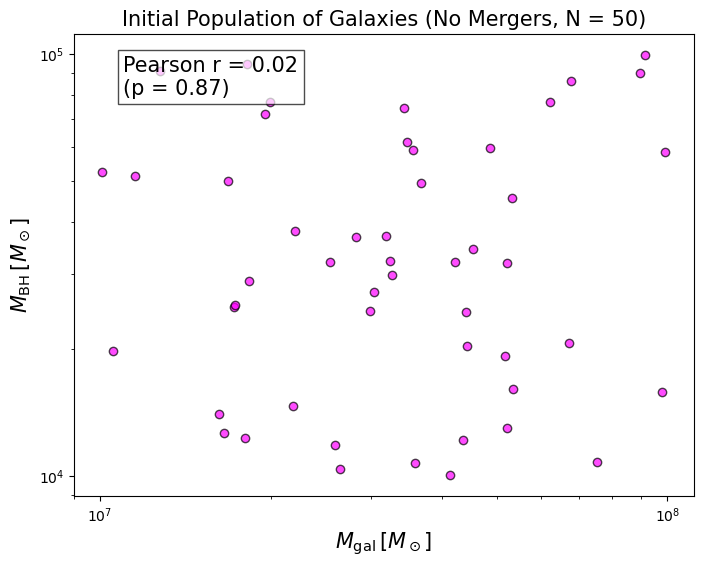

In [35]:
# Init
M_gal, M_bh = initialize_population(N)

# Compute correlation
r, p = correlation(M_gal, M_bh)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(M_gal, M_bh, alpha=0.7, edgecolor="k", color='magenta')

# Annotate correlation
plt.text(1.1e7, 8e4, f"Pearson r = {r:.2f}\n(p = {p:.2f})",
         fontsize=15, bbox=dict(facecolor="white", alpha=0.7))


plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M_{\mathrm{gal}} \, [M_\odot]$", size=15)
plt.ylabel(r"$M_{\mathrm{BH}} \, [M_\odot]$", size=15)
plt.title(f"Initial Population of Galaxies (No Mergers, N = {N})", size=15)
plt.show()

In [36]:
# run the mergers!
# Track correlation over time
r_history = []

for step in tqdm(range(n_mergers), desc="Merging galaxies"):
    M_gal, M_bh = merge_galaxies(M_gal, M_bh)

    # Only compute r every 1/100th of the total iterations
    if step % (n_mergers // 100) == 0:
        r, _ = correlation(M_gal, M_bh)
        r_history.append((step, r))  # also store the step for plotting


Merging galaxies: 100%|██████████| 220000/220000 [10:06<00:00, 362.47it/s]


In [37]:
# Save results to a .npz file
np.savez("final_merger_results.npz", M_gal=M_gal, M_bh=M_bh, r_history=np.array(r_history))

In [47]:
r_values = [r for _, r in r_history]

(n_mergers / 100)

2200.0

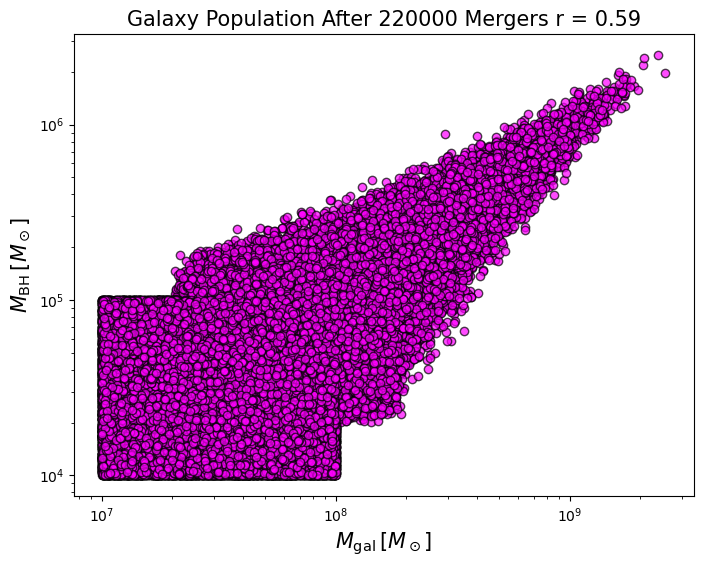

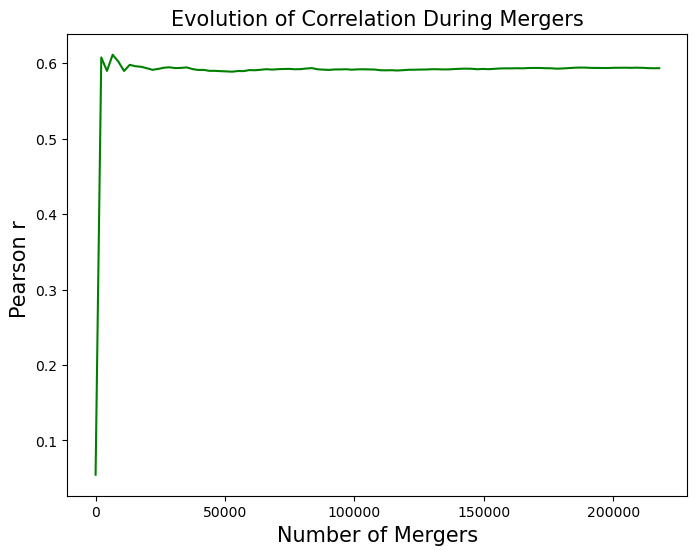

In [53]:
# Plot final population after n_mergers
plt.figure(figsize=(8,6))
plt.scatter(M_gal, M_bh, alpha=0.7, edgecolor="k", color='magenta')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M_{\mathrm{gal}} \, [M_\odot]$", size=15)
plt.ylabel(r"$M_{\mathrm{BH}} \, [M_\odot]$", size=15)
plt.title(f"Galaxy Population After {n_mergers} Mergers r = {r_history[-1][1]:.2f}", size=15)
plt.show()

# Plot correlation evolution
plt.figure(figsize=(8,6))
plt.plot(np.asarray(range(0, 100))*2200, r_values, color='green')
#plt.xscale('log')
plt.xlabel("Number of Mergers", size=15)
plt.ylabel("Pearson r ", size=15)
plt.title("Evolution of Correlation During Mergers", size=15)
plt.show()